In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,4
plt.rcParams['axes.grid']=True
plt.gray()

import seaborn as sns
import pandas_profiling

from scipy.stats import stats
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

<Figure size 720x288 with 0 Axes>

# Linear Regression Model Predection

<center>Data Pre-Precessing</center>

### Step1: <center><h3>Import the Data</h3></center>

In [11]:
# import Data
bankloan = pd.read_csv('bankloans.csv')
bankloan.sample(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
24,21,2,1,2,16,18.0,0.241920,2.638080,1.0
787,30,2,2,2,26,3.8,0.248976,0.739024,NaN
48,23,2,0,2,21,11.4,0.775656,1.618344,1.0
452,39,3,11,17,39,12.9,2.560779,2.470221,0.0
404,34,1,18,10,34,15.4,2.099636,3.136364,0.0


In [12]:
# Make a copy of original list
bankcpy = bankloan.copy()
bankcpy.sample(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
634,37,3,12,8,83,4.1,0.319882,3.083118,0.0
405,50,2,16,14,71,11.1,1.662891,6.218109,0.0
656,31,1,12,9,24,6.6,0.441936,1.142064,0.0
39,45,1,23,5,50,4.2,0.558600,1.541400,0.0
616,28,2,0,3,30,4.8,0.120960,1.319040,1.0


In [13]:
# Seprate Categorical and Numerical Variable
cat_var = []
num_var = []

for variable in bankloan.columns:
    if bankloan[variable].dtypes.name in ['object']:
        cat_var.append(variable)
    else:
        num_var.append(variable)

print(cat_var)
print(num_var)


[]
['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']


### Step2: 
<center><h3>2.1: Missing Value Treatment</h3></center>

In [14]:
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


In [15]:
bankloan.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [16]:
def missing(x):
    x = x.fillna(x.mean())
    return x


bankloan = bankloan.apply(lambda x: missing(x))

In [17]:
bankloan.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [18]:
nmiss_df = bankloan.isnull().sum()
nmiss_df
pd.concat([bankcpy.describe().T, nmiss_df], axis=1, join='inner')

,count,mean,std,min,25%,50%,75%,max,0
age,850.0,35.029412,8.041432,20.000000,29.000000,34.000000,41.000000,56.00000,0
ed,850.0,1.710588,0.927784,1.000000,1.000000,1.000000,2.000000,5.00000,0
employ,850.0,8.565882,6.777884,0.000000,3.000000,7.000000,13.000000,33.00000,0
address,850.0,8.371765,6.895016,0.000000,3.000000,7.000000,12.000000,34.00000,0
income,850.0,46.675294,38.543054,13.000000,24.000000,35.000000,55.750000,446.00000,0
debtinc,850.0,10.171647,6.719441,0.100000,5.100000,8.700000,13.800000,41.30000,0
creddebt,850.0,1.576805,2.125840,0.011696,0.382176,0.885091,1.898440,20.56131,0
othdebt,850.0,3.078789,3.398803,0.045584,1.045942,2.003243,3.903001,35.19750,0
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000,0


In [19]:
nmiss_df

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

<center><h3>2.2: Outlier Treatment</h3></center>

In [20]:
num_var

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

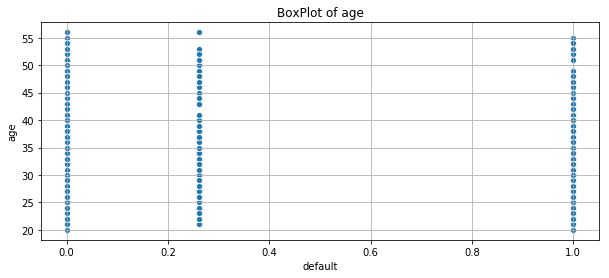

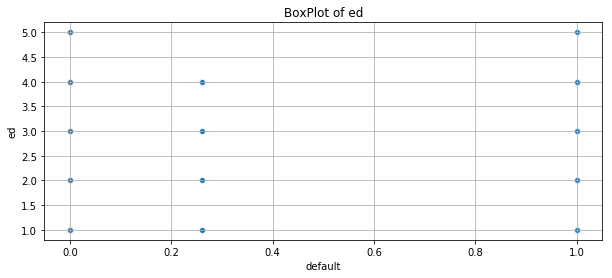

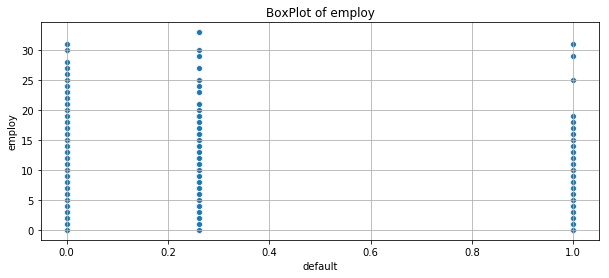

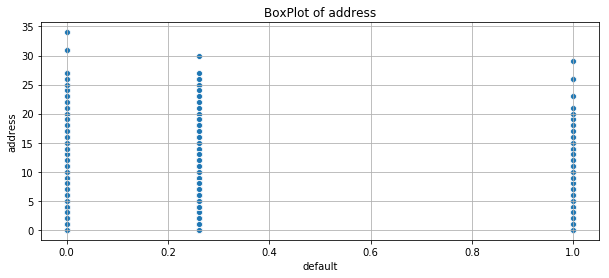

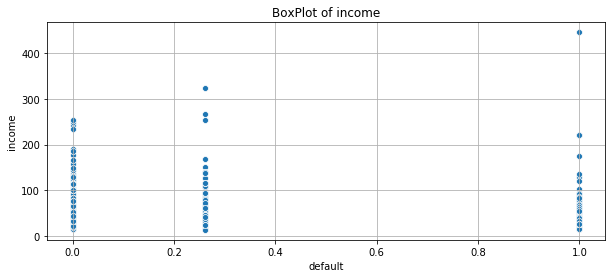

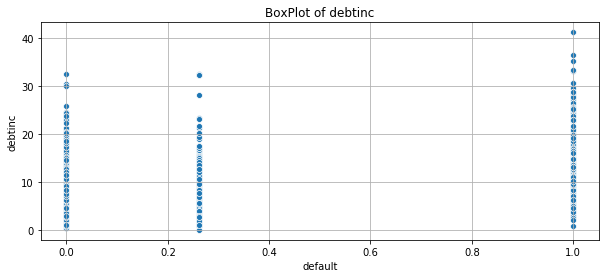

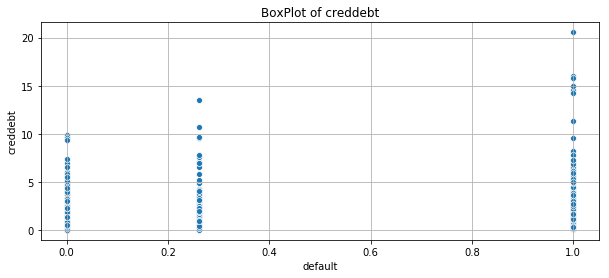

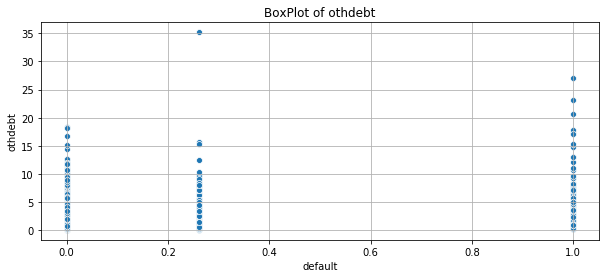

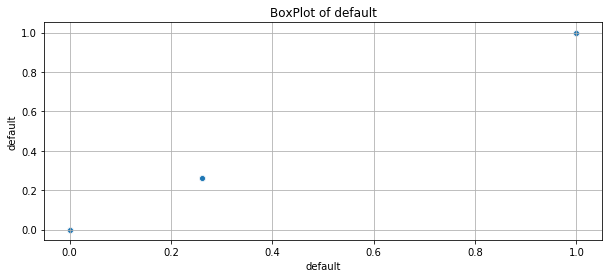

In [26]:
# For this need to see the graph which is very helpful to recognise that which variable need this treatment

bp = PdfPages('BoxPLot with attrition split.pdf')
for variable in bankloan.columns:
    fig, axes = plt.subplots(figsize = (10,4))
    sns.scatterplot(x = 'default', y = variable, data=bankloan)
    plt.title(str('BoxPlot of ') + str(variable))
    bp.savefig(fig)
bp.close()


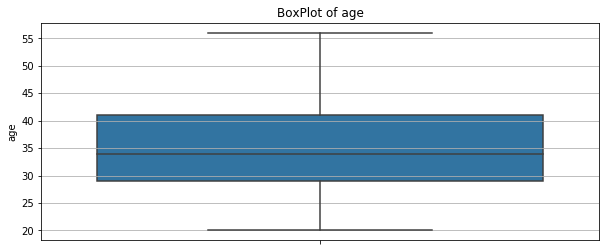

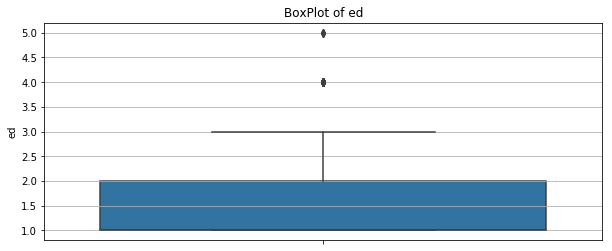

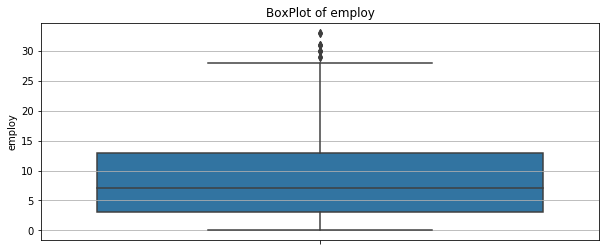

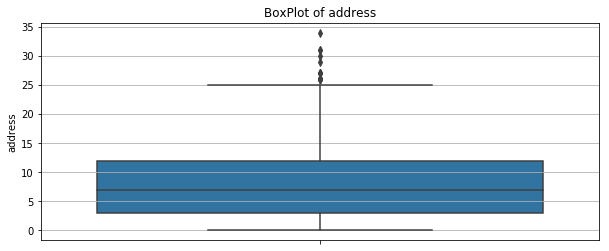

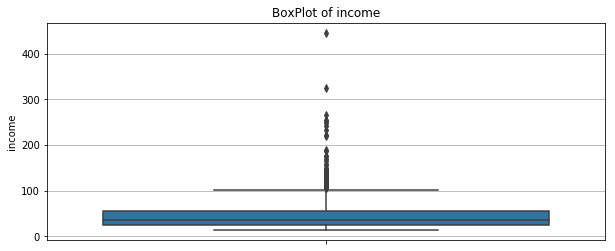

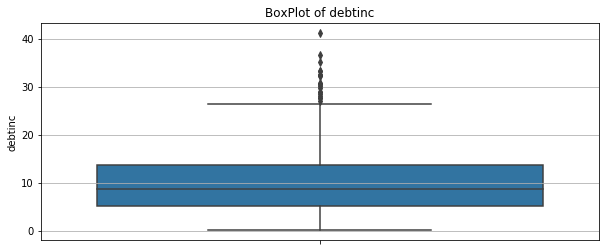

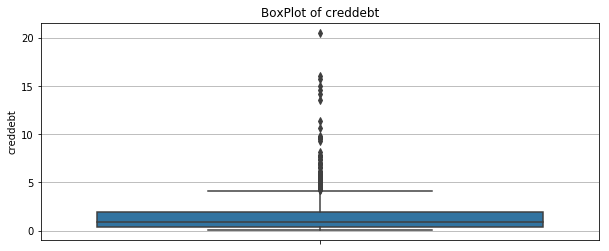

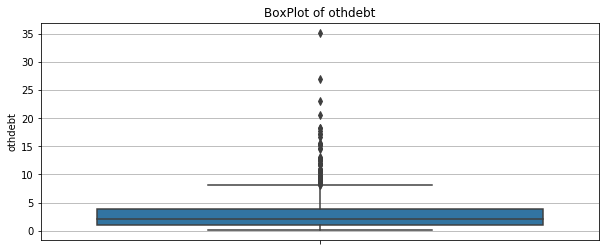

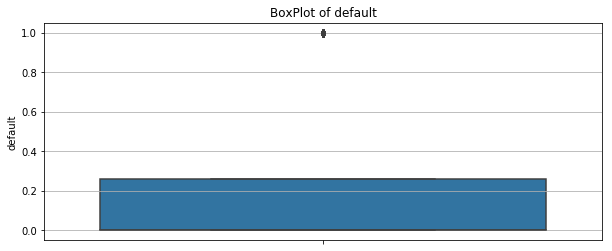

In [25]:
bp = PdfPages('BoxPlot of Total View.pdf')
for variable in num_var:   # num_var or bankloan.columns
    fig, axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=variable, data=bankloan)
    plt.title(str('BoxPlot of ') + str(variable))
    bp.savefig(fig)
bp.close()

In [27]:
bankloan.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [28]:
def outlier_treatment(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
bankloan = bankloan.apply(lambda x: outlier_treatment(x))
bankloan.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,10.285997,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
5,41.0,2.0,5.0,5.0,25.0,10.2,0.392700,2.157300,0.0
6,39.0,1.0,20.0,9.0,67.0,30.6,3.833874,16.668126,0.0
7,43.0,1.0,12.0,11.0,38.0,3.6,0.128592,1.239408,0.0
8,24.0,1.0,3.0,4.0,19.0,24.4,1.358348,3.277652,1.0
9,36.0,1.0,0.0,13.0,25.0,19.7,2.777700,2.147300,0.0


### Step 3:
<center><h3>Pandas_profiling</h3></center> 

In [29]:
pandas_profiling.ProfileReport(bankloan)

Number of variables,9
Number of observations,850
Total Missing (%),0.0%
Total size in memory,59.8 KiB
Average record size in memory,72.1 B
Numeric,9
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [30]:
# find Correlation of "bankloan"
bankloan.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.008552,0.554711,0.599109,0.506648,0.008518,0.286229,0.349431,-0.125135
ed,0.008552,1.000000,-0.154071,0.050693,0.216483,0.009836,0.114939,0.144089,0.107145
employ,0.554711,-0.154071,1.000000,0.344982,0.654170,-0.036171,0.381175,0.425177,-0.254620
address,0.599109,0.050693,0.344982,1.000000,0.325416,-0.031900,0.162819,0.200138,-0.148332
income,0.506648,0.216483,0.654170,0.325416,1.000000,-0.030962,0.547318,0.629765,-0.080452
debtinc,0.008518,0.009836,-0.036171,-0.031900,-0.030962,1.000000,0.537296,0.592348,0.357959
creddebt,0.286229,0.114939,0.381175,0.162819,0.547318,0.537296,1.000000,0.641185,0.211887
othdebt,0.349431,0.144089,0.425177,0.200138,0.629765,0.592348,0.641185,1.000000,0.125922
default,-0.125135,0.107145,-0.254620,-0.148332,-0.080452,0.357959,0.211887,0.125922,1.000000


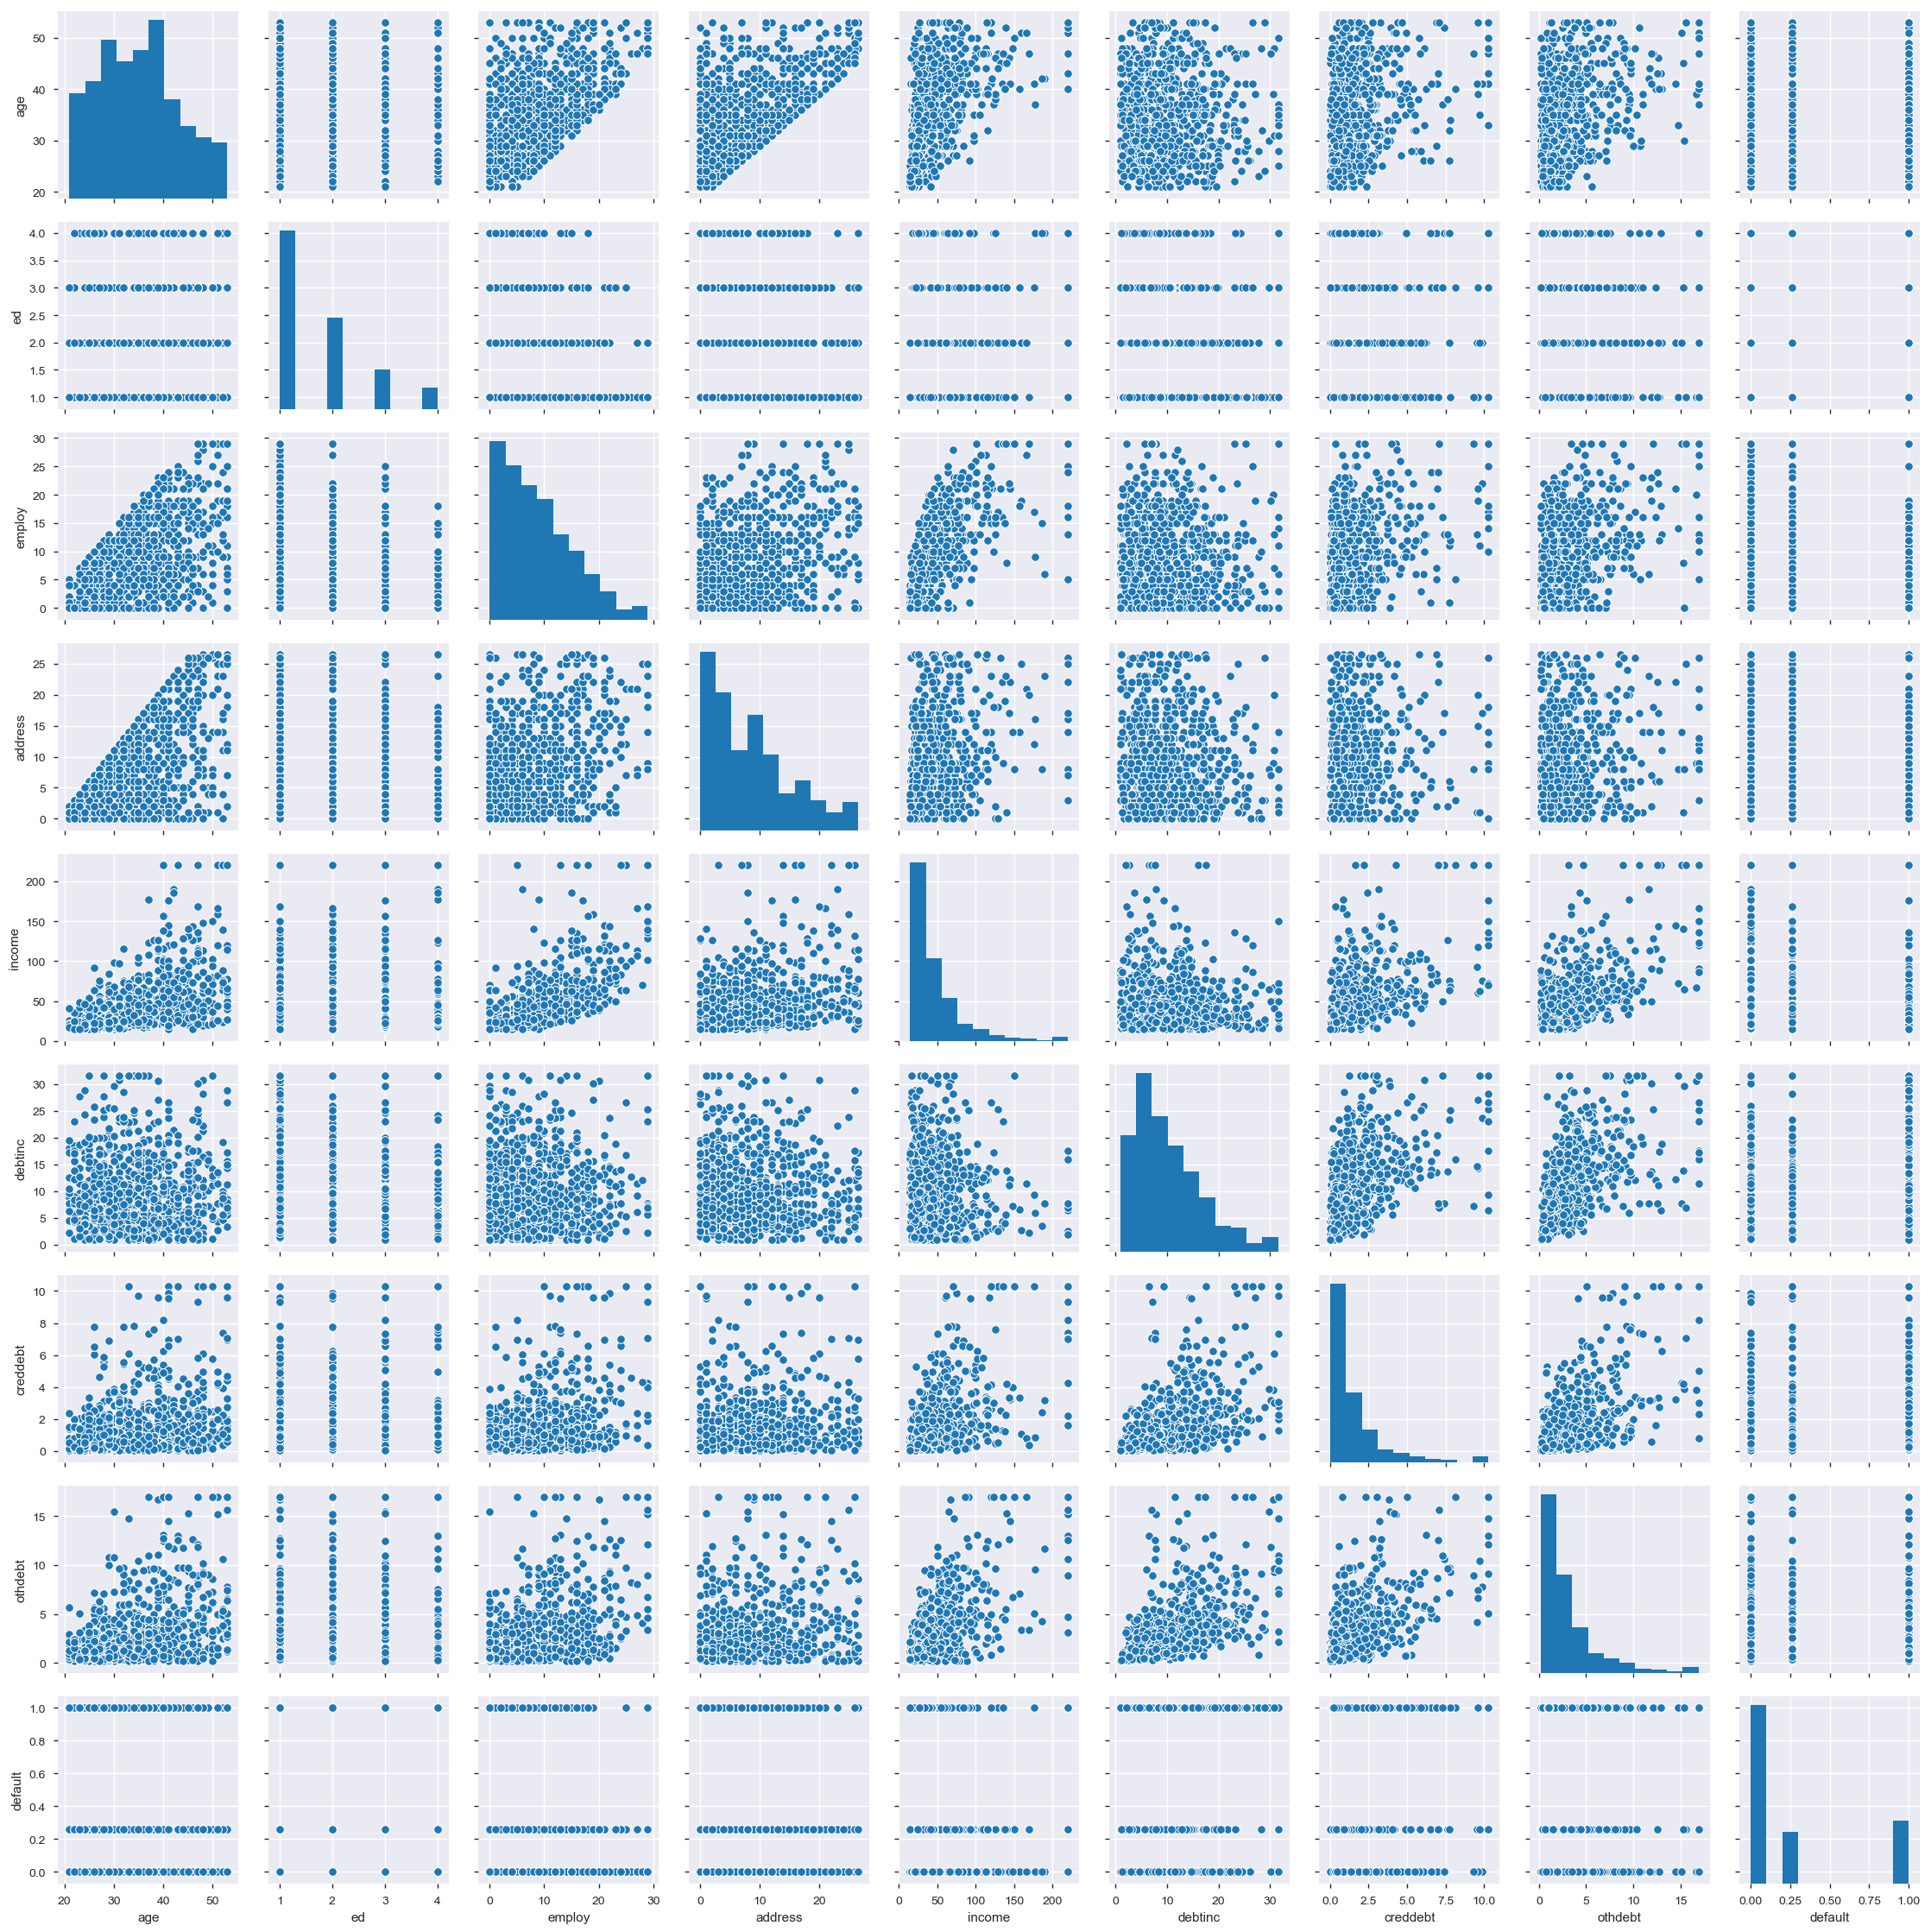

In [34]:
sns.pairplot(bankloan)

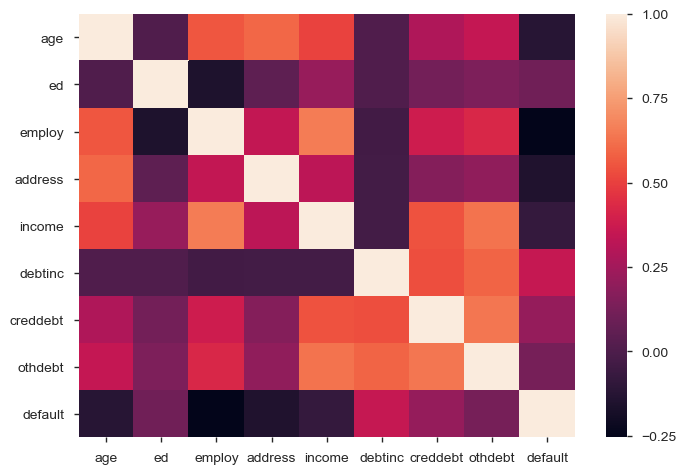

In [35]:
sns.heatmap(bankloan.corr())

### Step 4: 
<center> <h3>  Data Exploratory Analysis<br> <h4>Variable Selection(ttest,chi-sq,log likelyhood)</h4></h3></center>

In [36]:
from scipy.stats import stats

In [37]:
# There is no any categorical Variable so we need to find "ttest" for Numerical Variable

tstats_df = pd.DataFrame()

for variable in num_var:
    tstats = stats.ttest_ind(bankloan[bankloan['default']==0][variable], bankloan[bankloan['default']==1][variable])
    temp = pd.DataFrame([variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable', 'T-Staticstic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)


tstats_df

,Variable,T-Staticstic,P-Value
0,age,3.69917,0.000233312
1,ed,-3.15351,0.00168236
2,employ,7.8409,1.67631e-14
3,address,4.42701,1.10862e-05
4,income,2.43689,0.0150629
5,debtinc,-11.1445,1.16185e-26
6,creddebt,-6.51326,1.40695e-10
7,othdebt,-3.69498,0.000237122
8,default,-inf,0


F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


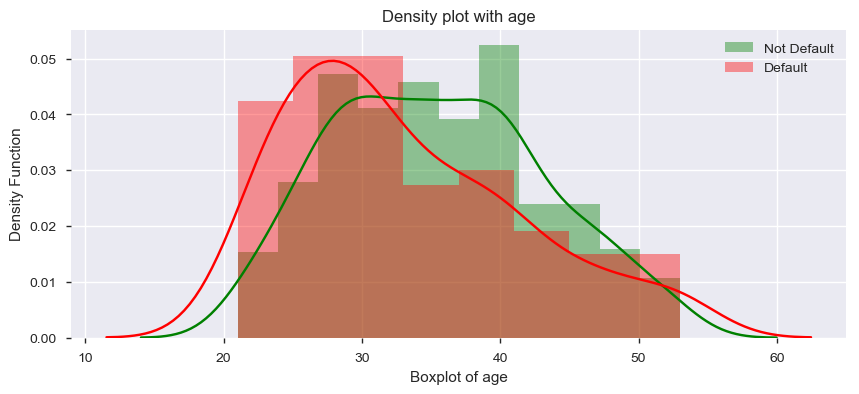

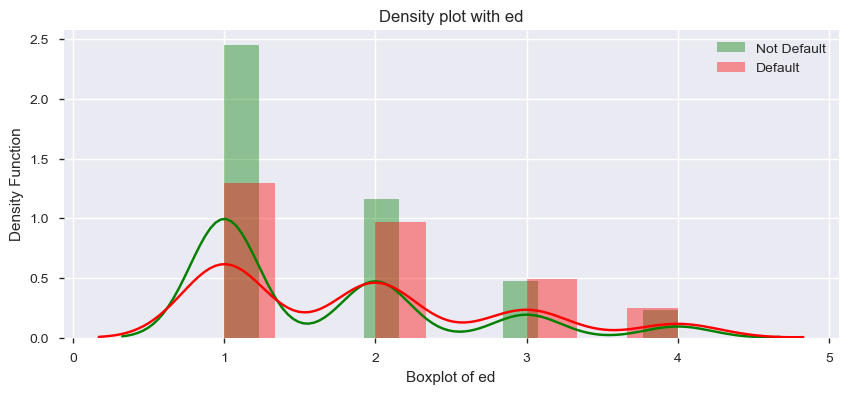

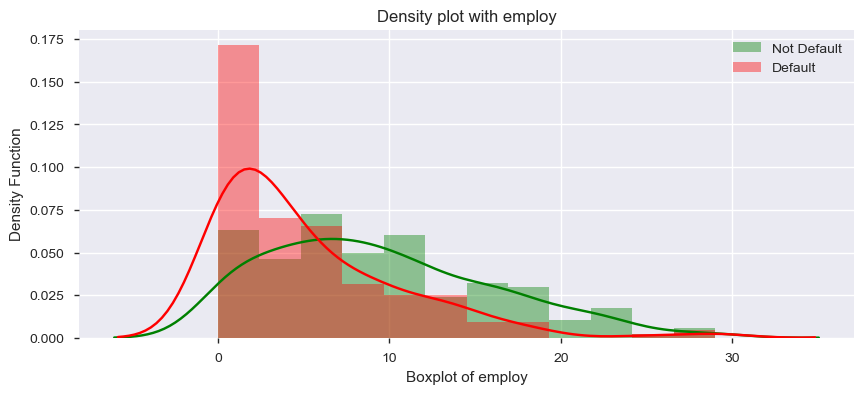

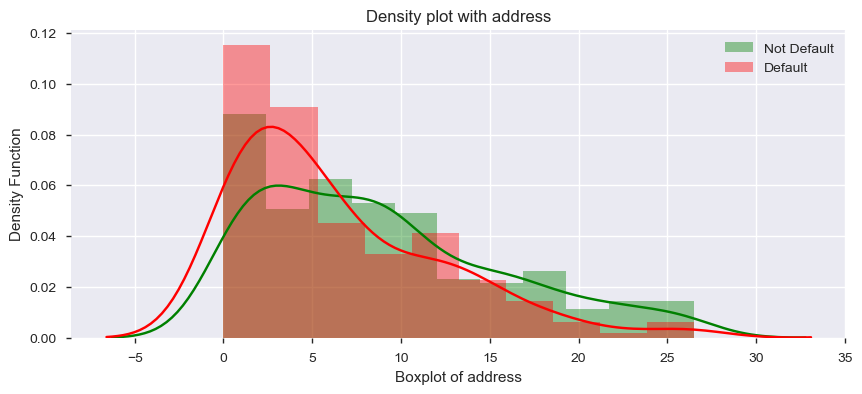

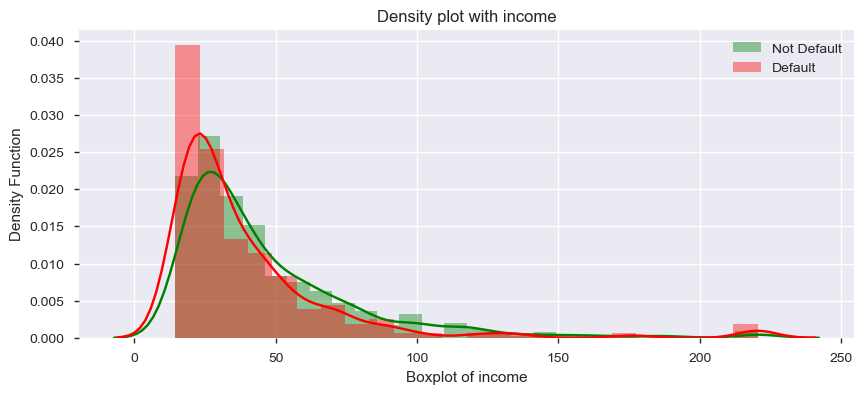

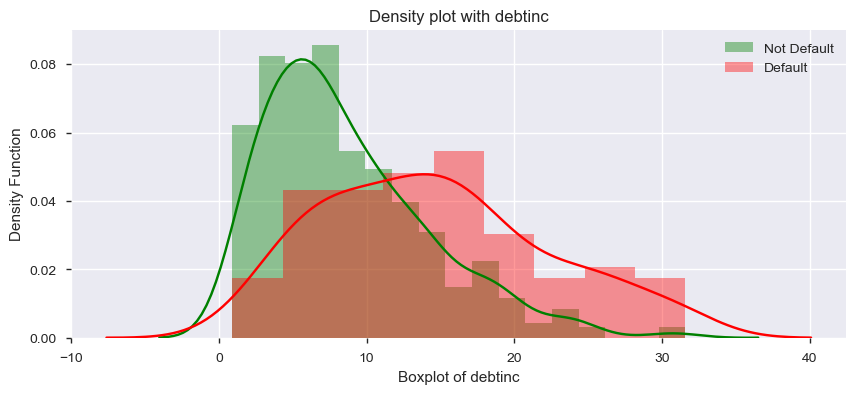

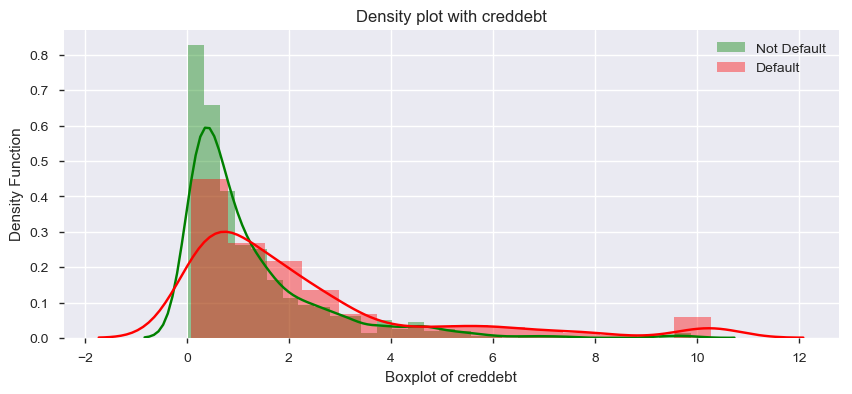

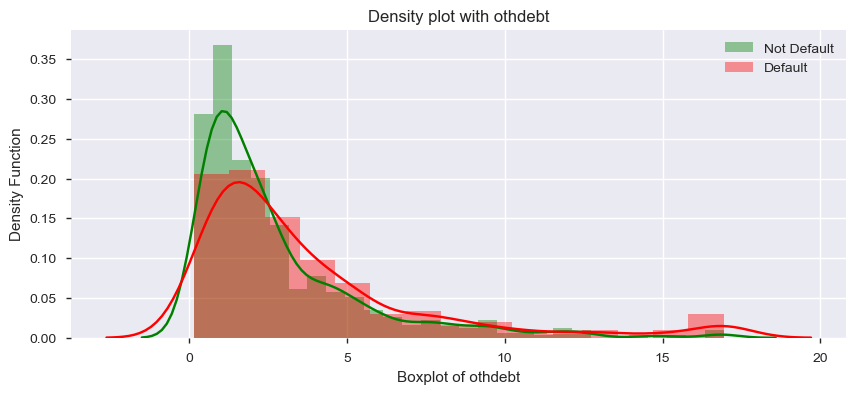

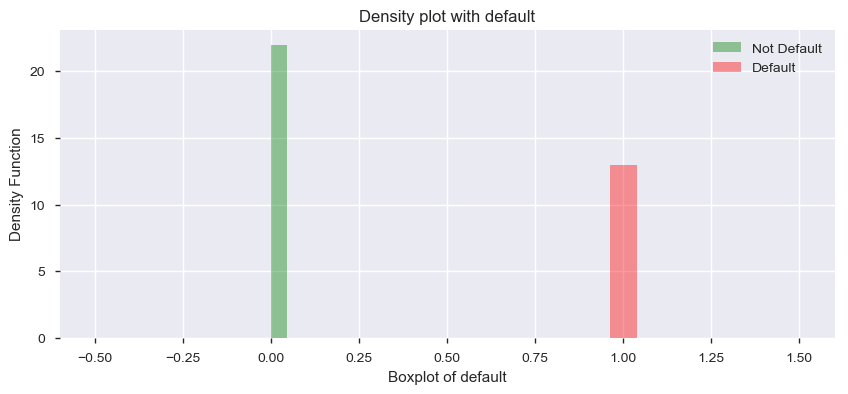

In [38]:
# Visualization Graph
bp = PdfPages("Density graph with Attrition split.pdf")
for variable in bankloan.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.distplot(bankloan[bankloan['default']==0][variable], label='Not Default', color='g', hist=True, norm_hist=False )
    sns.distplot(bankloan[bankloan['default']==1][variable], label='Default', color='r', hist=True, norm_hist=False)
    plt.xlabel(str('Boxplot of ') + str(variable))
    plt.ylabel('Density Function')
    plt.title(str('Density plot with ') + str(variable))
    plt.legend()
    bp.savefig(fig)
bp.close()

### Step 5: Bining
<center><h3>WOE(Weight of Evidence</h3></center>

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


,address,age,creddebt,debtinc,ed,employ,income,othdebt
1,-0.736276,-0.259751,-1.371666,-2.007365,-1.255488,-0.170642,-0.841409,-1.187171
2,-0.735692,-0.791406,-0.823946,-1.613376,NaN,-0.748348,-1.153300,-1.180490
3,-0.920525,-0.848899,-0.732402,-1.321928,NaN,-1.419249,-1.317315,-0.673610
4,-1.643052,-0.963599,-0.832336,-1.031537,-0.884603,-1.381690,-1.363154,-0.968817
5,-0.864522,-1.312900,-1.200584,-0.513410,NaN,-1.334665,-2.292636,-0.581946
6,-0.910963,-1.474621,0.006095,-0.385918,NaN,-1.957717,-1.086459,-1.145927
7,-1.509449,-1.470334,0.126518,-0.201268,-0.693444,-1.871086,-2.070063,-1.230220
8,-1.930632,-1.459319,0.602038,0.301956,NaN,-3.582861,-1.086459,-0.136538
9,-2.172082,-1.172361,NaN,1.558534,NaN,-1.716785,-inf,-0.693147
10,-1.664886,-0.905648,0.418180,0.815091,-0.703522,-1.173491,-0.496223,0.400431


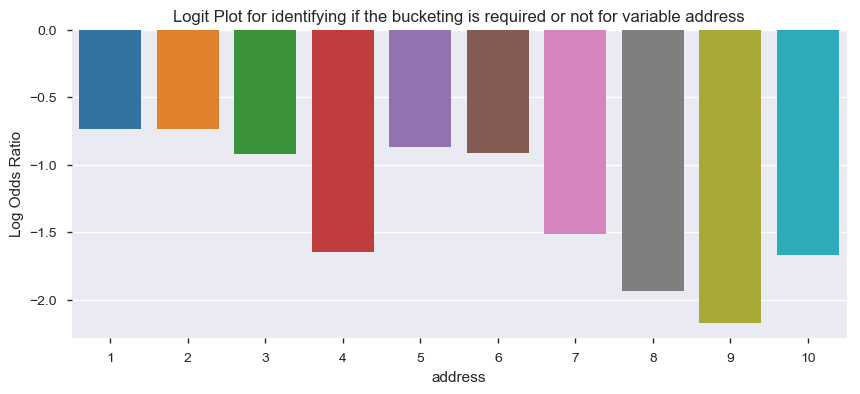

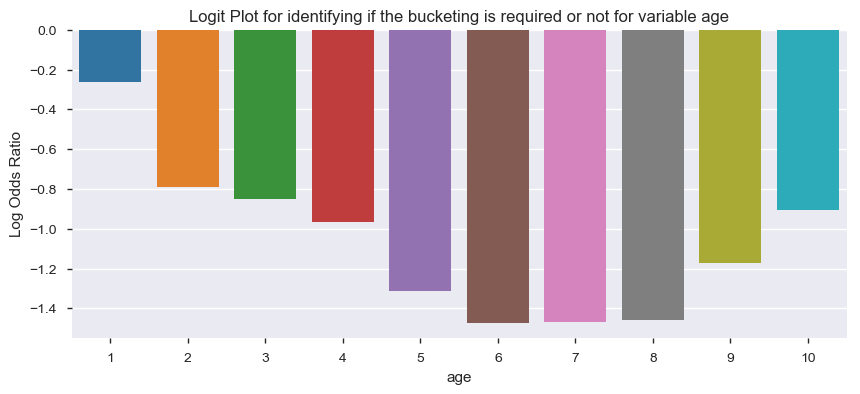

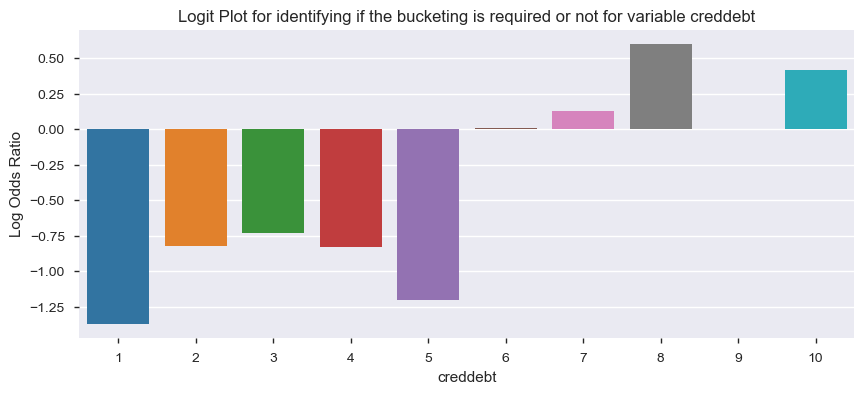

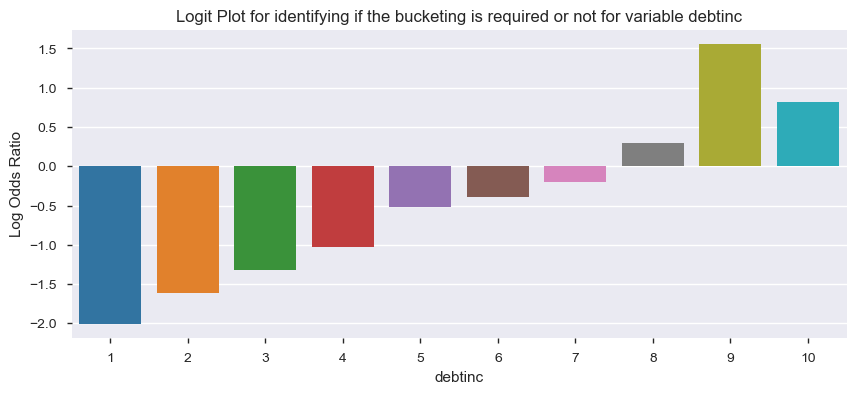

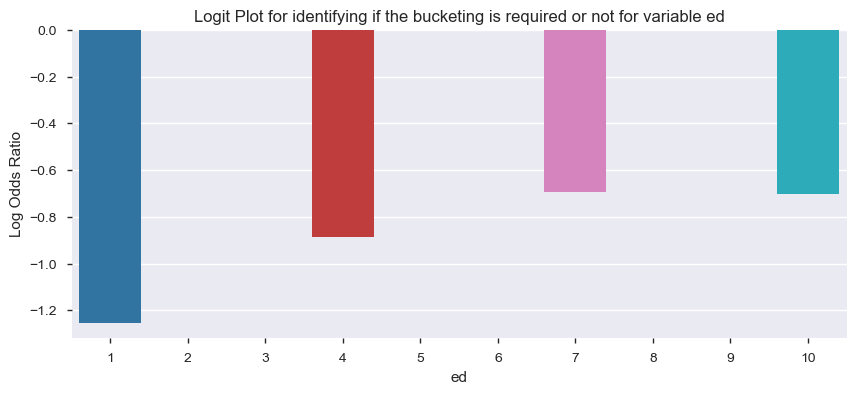

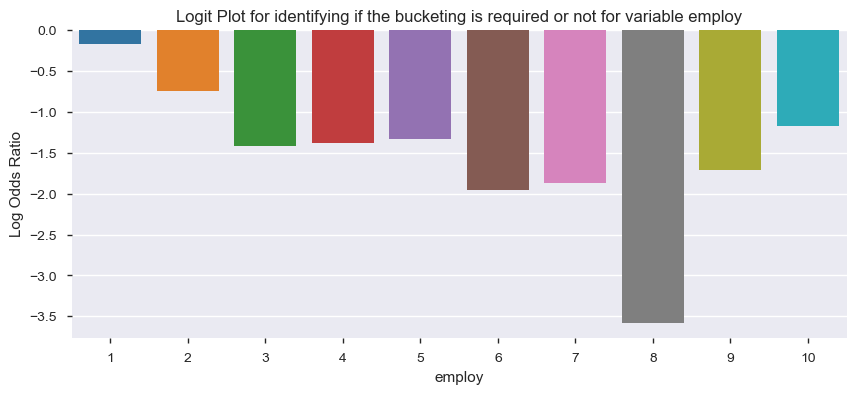

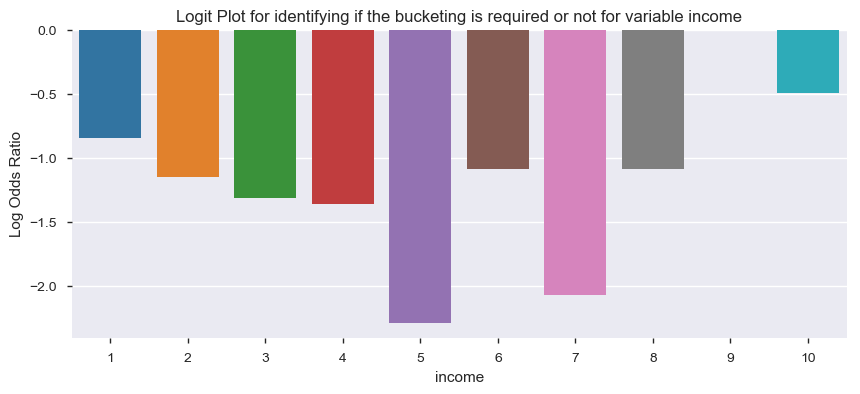

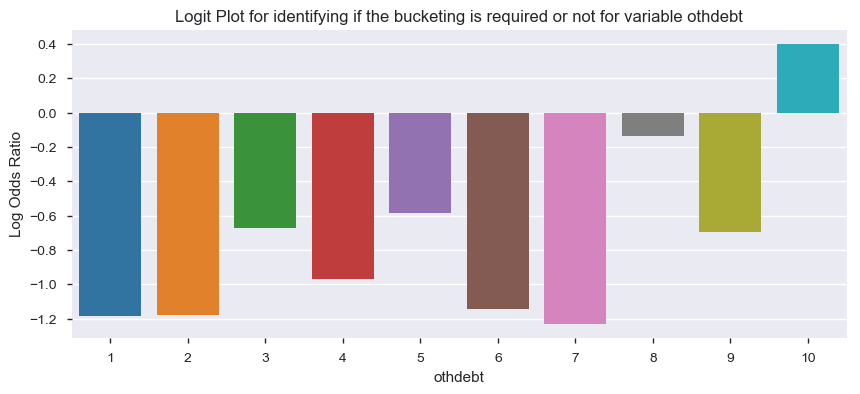

In [43]:
ser1 = pd.DataFrame()
bp = PdfPages('Transformation Plot.pdf')

for variable in bankloan.columns.difference(['default']):
    binned = pd.cut(bankloan[variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = bankloan.groupby(binned)['default'].sum() / (bankloan.groupby(binned)['default'].count() - bankloan.groupby(binned)['default'].sum())
    ser = np.log(ser)
    # ser.columns = ['variable']
    ser1 = pd.concat([ser1, ser], axis=1, ignore_index=True)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(variable))
    bp.savefig(fig)
bp.close()
ser1.columns = bankloan.columns.difference(['default'])
ser1

In [44]:
print('These variables needs bucketing :- creddebt, othdebt, debtinc, employ, income ')
bankcpy.columns

These variables needs bucketing :- creddebt, othdebt, debtinc, employ, income 


Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [49]:
bankcpy[['creddebt', 'othdebt', 'debtinc', 'employ', 'income']].describe(percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
creddebt,850.0,1.576805,2.125840,0.011696,0.178306,0.314249,0.451832,0.623441,0.885091,1.194903,1.608792,2.285203,3.703304,20.56131,20.56131
othdebt,850.0,3.078789,3.398803,0.045584,0.552050,0.896570,1.170913,1.548538,2.003243,2.562585,3.248991,4.565014,7.111941,35.19750,35.19750
debtinc,850.0,10.171647,6.719441,0.100000,2.900000,4.500000,5.800000,7.100000,8.700000,10.500000,12.730000,15.120000,19.200000,41.30000,41.30000
employ,850.0,8.565882,6.777884,0.000000,1.000000,2.000000,4.000000,6.000000,7.000000,9.000000,11.300000,14.000000,18.000000,33.00000,33.00000
income,850.0,46.675294,38.543054,13.000000,19.000000,22.000000,26.000000,30.000000,35.000000,41.000000,49.300000,63.000000,84.000000,446.00000,446.00000


In [52]:
## Variance Inflation Factor assessment
X = pd.concat([bankcpy[bankcpy.columns.difference(['default'])],bankcpy['default']], axis=1)
features = "+".join(bankcpy.columns.difference(['default']))
X.head()

a,b = dmatrices(formula_like='default ~ '+ features, data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif

,VIF Factor,features
0,34.989407,Intercept
1,1.563287,address
2,2.018512,age
3,2.516961,creddebt
4,3.246393,debtinc
5,1.262185,ed
6,2.204052,employ
7,4.206131,income
8,3.850861,othdebt


### Modeling of Data

In [69]:
#Train and Test split

train_features = bankloan.columns.difference(['default'])
train_X, test_X = train_test_split(bankloan, test_size=0.3, random_state=42)
train_X.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [70]:
logreg = sm.logit(formula='default ~ ' + "+".join(train_features), data=train_X)
result = logreg.fit()
summ = result.summary()
summ

Optimization terminated successfully.
         Current function value: 0.410180
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  595
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Jun 2019   Pseudo R-squ.:                  0.2474
Time:                        17:07:57   Log-Likelihood:                -244.06
converged:                       True   LL-Null:                       -324.28
                                        LLR p-value:                 1.292e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7877      0.635     -2.814      0.005      -3.033      -0.542
address       -0.0479      0.021     -2.272      0.023      -0.089      -0.007
age            0.0107      0.018      0.599      0.549      -0.024       0.046
creddebt       0.2863      0.099      2.890      0.004       0.092       0.480
debtinc        0.0981      0.031      3.133      0.002       0.037       0.159
ed             0.0583      0.124      0.469      0.639      -0.186       0.302
employ        -0.1421      0.028     -5.027      0.000      -0.197      -0.087
income         0.0048      0.008      0.604      0.546      -0.011       0.020
othdebt       -0.0350      0.076     -0.462      0.644      -0.183       0.114
==============================================================================
"""

In [71]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train_X))
train_predicted_prob.columns = ['prob']
train_actual = train_X['default']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
136,0.000000,0.448763
703,0.261429,0.105455
425,0.000000,0.118795
140,1.000000,0.577495
173,0.000000,0.179668


In [74]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test_X))
test_predicted_prob.columns = ['prob']
test_actual = test_X['default']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
512,0.0,0.123332
357,1.0,0.539928
110,0.0,0.287710
684,0.0,0.045512
39,0.0,0.018024


In [75]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [82]:
train_temp.head()

,actual,prob,cut_off,predicted,tp,fp,tn,fn
136,0.000000,0.448763,1.0,0.0,0.0,0.0,1.0,0.0
703,0.261429,0.105455,1.0,0.0,0.0,0.0,0.0,0.0
425,0.000000,0.118795,1.0,0.0,0.0,0.0,1.0,0.0
140,1.000000,0.577495,1.0,0.0,0.0,0.0,0.0,1.0
173,0.000000,0.179668,1.0,0.0,0.0,0.0,1.0,0.0


In [78]:
roc_like_df.reset_index(drop=True)

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
1,0.020408,1.000000,0.029973
2,0.040816,1.000000,0.128065
3,0.061224,1.000000,0.185286
4,0.081633,0.991935,0.245232
5,0.102041,0.983871,0.337875
6,0.122449,0.967742,0.376022
7,0.142857,0.943548,0.468665
8,0.163265,0.935484,0.534060
9,0.183673,0.919355,0.564033


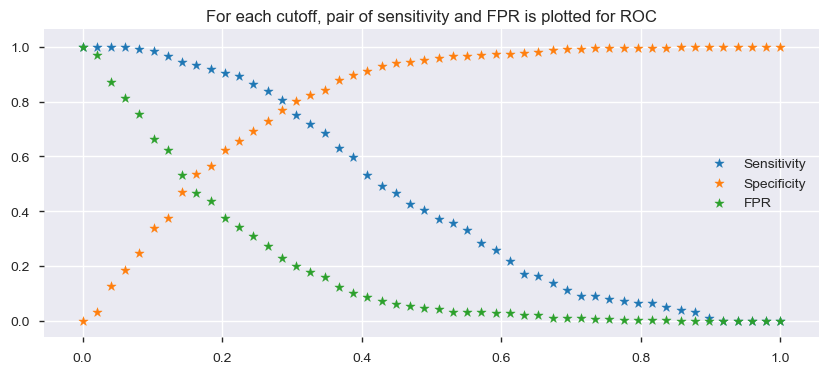

In [79]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [80]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.285714,0.806452,0.771117,1.577569


In [90]:
test_predict.head()

,actual,prob,predicted
512,0,0.123332,0
357,1,0.539928,1
110,0,0.287710,1
684,0,0.045512,0
39,0,0.018024,0


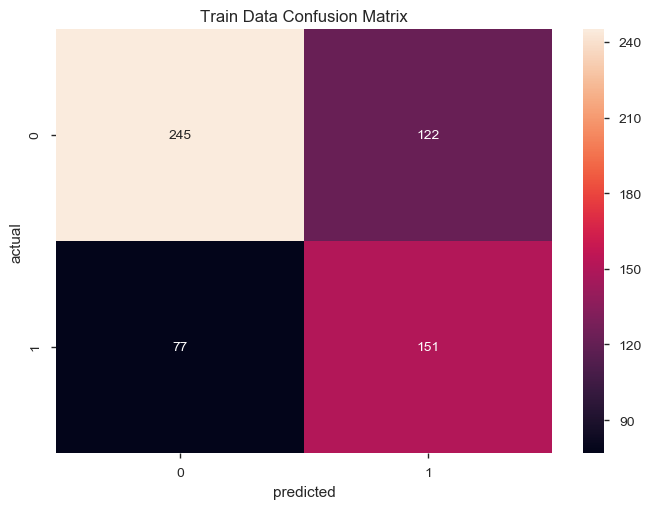

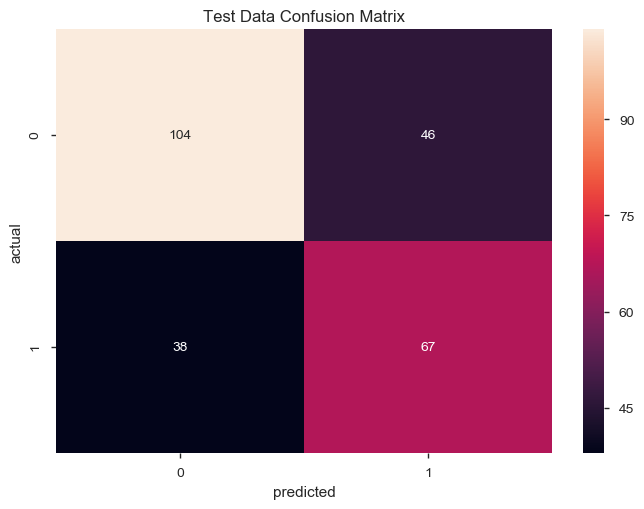

In [89]:
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.23 else 0)
train_predict['actual'] = train_predict['actual'].apply(lambda x: 1 if x > 0.23 else 0)

sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.23 else 0)
test_predict['actual'] = test_predict['actual'].apply(lambda x: 1 if x > 0.23 else 0)
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()
# (117+236)/(117+236+120+17)

In [91]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.6655462184873949
The overall accuracy score for the Test Data  is :  0.6705882352941176


In [92]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)
#test['Deciles']=pd.qcut(test['prob'],10, labels=False)
train_predict.head()

,actual,prob,predicted,Deciles
136,0,0.448763,1,8
703,1,0.105455,0,2
425,0,0.118795,0,2
140,1,0.577495,1,9
173,0,0.179668,0,4


In [93]:
df = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)

In [95]:
df

,Deciles,actual
Deciles,,
9,540,48
8,472,36
7,420,29
6,354,26
5,295,19
4,240,19
3,177,10
2,120,14
1,59,15


In [96]:
df_count = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)

In [97]:
df_count

,Deciles,actual
Deciles,,
9,60,60
8,59,59
7,60,60
6,59,59
5,59,59
4,60,60
3,59,59
2,60,60
1,59,59
